In [16]:
#Some imports
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time

'''
Define the grid to be working with
**inputs:
dim = dimension size of the grid
n = number of mines
**returns:
board = the grid to be worked with
'''

def environment(dim, n):
    #start with a dim by dim zero array
    
    board = np.zeros((dim,dim))
    
    if n >= dim**2:
        print("Too many mines!")
        return
    
    while n > 0:
        i = random.randint(0, dim - 1)
        j = random.randint(0, dim - 1)
        
        if board[i][j] == 1:
            pass
        else:
            board[i][j] = 1
            n -= 1        
    return board

# given board and coordinate, return number of adjacent mines and safe squares
def checkEnvironment(board, i, j):
    mines_hit = 0
    if board[i][j] == 1:
        print("hit mine")
        mines_hit = 1
    
    mines = 0
    safes = 0
    rightValid = False
    leftValid = False
    upValid = False
    downValid = False
    if j - 1 >= 0:
        leftValid = True
    if j + 1 < len(board):
        rightValid = True
    if i + 1 < len(board):
        downValid = True
    if i - 1 >= 0:
        upValid = True
        
    #check left
    if leftValid == True:
        #check left adjacent
        if board[i][j-1] == 1:
            #mine is here
            mines += 1
        else:
            #no mine is here
            safes += 1
        #check left & up
        if upValid == True:
            if board[i-1][j-1] == 1:
                #mine is here
                mines += 1
            else:
                #no mine is here
                safes += 1
        #check left & down
        if downValid == True:
            if board[i+1][j-1] == 1:
                #mine is here
                mines += 1
            else:
                #no mine is here
                safes += 1
    #check right
    if rightValid == True:
        #check right adjacent
        if board[i][j+1] == 1:
            #mine is here
            mines += 1
        else:
            #no mine is here
            safes += 1
        #check right & up
        if upValid == True:
            if board[i-1][j+1] == 1:
                #mine is here
                mines += 1
            else:
                #no mine is here
                safes += 1
        #check right & down
        if downValid == True:
            if board[i+1][j+1] == 1:
                #mine is here
                mines += 1
            else:
                #no mine is here
                safes += 1
    #check up adjacent
    if upValid == True:
        if board[i-1][j] == 1:
            #mine is here
            mines += 1
        else:
            #no mine is here
            safes += 1
    #check down adjacent
    if downValid == True:
        if board[i+1][j] == 1:
            #mine is here
            mines += 1
        else:
            #no mine is here
            safes += 1
            
    return mines_hit, mines, safes

'''
def game(dim, n):
    board = environment(dim, n)
    plt.imshow(board, cmap=plt.cm.binary)
    plt.show()
    agent_info = []
    
    #the first move should be random
    i = random.randint(0, dim - 1)
    j = random.randint(0, dim - 1)
    print("i:", i)
    print("j:", j)
    
    #the agent will query the environment
    move_data = checkEnvironment(board, i, j)
    
    #if we did not hit a mine, continue
    if move_data[0] == 0:
        return move_data
    #if we did hit a mine, report the mine and end
    else:
        print("Hit A Mine!")
        return move_data
    
    while True:
        print("keep going")
        user = input()
        if user == 'q':
            break
        else:
''' 

def game(dim, n):
    board = environment(dim, n)
    plt.imshow(board, cmap=plt.cm.binary)
    plt.show()
    agent_info = []
    
    #the first move should be random
    print("i:")
    i = int(input())
    print("j:")
    j = int(input())
    
    #the agent will query the environment
    move_data = checkEnvironment(board, i, j)
    
    #if we did not hit a mine, continue
    if move_data[0] == 0:
        pass
    #if we did hit a mine, report the mine and end
    else:
        print("Hit A Mine!")
        return move_data
    
    while True:
        print("keep going?")
        user = input()
        if user == 'q':
            break
        else:
            print("hi")


In [17]:
a = environment(10, 10)
print(a)
b = environment(10, 0)
print(checkEnvironment(a, 4,3))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(0, 1, 7)


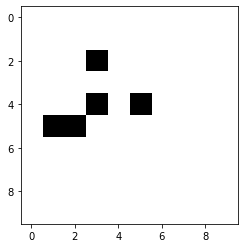

i:
0
j:
0
keep going?
y
hi
keep going?
y
hi
keep going?
q


In [14]:
game(10,5)